In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
from math import sqrt
import pandas_profiling

import env
import acquire
import prep
import explore_final
import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from statsmodels.formula.api import ols

## Initial Hypothesis

Square footbage and home value extremes are leading drivers of log error discrepancies.

## Acquire and summarize data

Initial Dataframe included single family residence homes with 40+ initial fields brought in.

After reviewing the data for missing values, collinearity, and low correlation we dropped our data down to 14 columns and 54,00 rows. 300 values were imputed on lotsizesquarefeet with the mean in order to keep the column.

In [3]:
#nmysql query single family residence from zillow DB
df = prep.prep_df()

In [4]:
df.shape

(54544, 14)

## Data prep, test/train split

Our initial datafram was split into 75/25 train/test adding a tax_per_sqft field. Random State 123 was used.

In [5]:
#train test split and adding a tax_per_sqft field
train, test = train_test_split(df, train_size = .75, random_state = 123)
train['tax_per_sqft'] = train.tax_value/train.sqft
test['tax_per_sqft'] = test.tax_value/test.sqft

In [6]:
train.head(2)

,bathrooms,bedrooms,sqft,tax_value,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,logerror,tax_per_sqft
12854,2.0,3.0,1838.0,216159.0,6037.0,34613754.0,-118209598.0,9796.0,40227.0,3101.0,97329.0,1999.0,172934.0,0.051355,117.605550
6103,2.0,3.0,2306.0,181378.0,6037.0,33764859.0,-118414326.0,10306.0,33311.0,3101.0,96121.0,1968.0,109124.0,0.005659,78.654814


## Initial exploration and feature selection

In [7]:
#adding a baseline yhat as mean of log error and residual amt based off that.
train['mean_logerror'] = train.logerror.mean()
train['residual'] = train['logerror']- train['mean_logerror']

In [8]:
train.head(2)

,bathrooms,bedrooms,sqft,tax_value,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,logerror,tax_per_sqft,mean_logerror,residual
12854,2.0,3.0,1838.0,216159.0,6037.0,34613754.0,-118209598.0,9796.0,40227.0,3101.0,97329.0,1999.0,172934.0,0.051355,117.605550,0.016239,0.035115
6103,2.0,3.0,2306.0,181378.0,6037.0,33764859.0,-118414326.0,10306.0,33311.0,3101.0,96121.0,1968.0,109124.0,0.005659,78.654814,0.016239,-0.010581


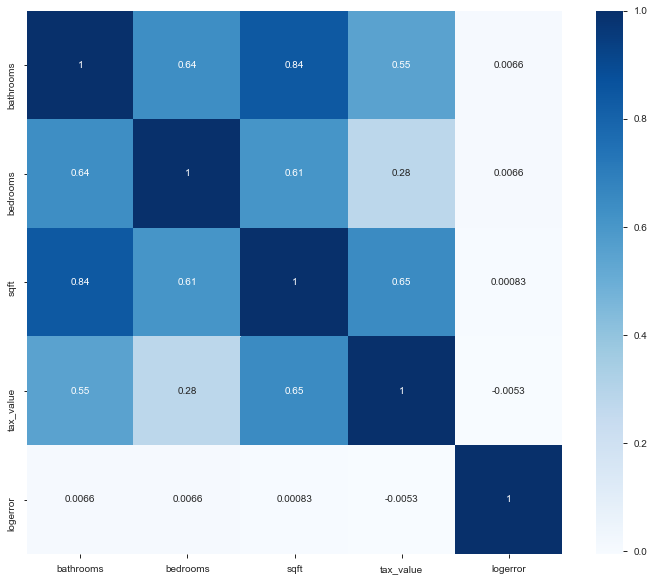

In [9]:
# Heatmap of possible initial features
plt.figure(figsize=(12,10))
subset = train[['bathrooms','bedrooms','sqft','tax_value','logerror']]
cor = subset.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Blues)
plt.show()

## Initial Baseline score

In [10]:
#Baseline MSE test
train['residual^2'] = train.residual ** 2
SSE = sum(train['residual^2'])
MSE = SSE/len(train)
print("MSE = ", MSE)

MSE =  0.028226598428296255


## MVP

After some basic feature engineering and selection we reran the model on just sqft and bedrooms. This model performed slightly better than our baseline.

In [11]:
# MVP using bedrooms and sqft
train['residual^2'] = train.residual ** 2
SSE = sum(train['residual^2'])
MSE = SSE/len(train)
print("MSE = ", MSE)

MSE =  0.028226598428296255


## Exploration

We decided to explore clustering on the y variable to help us in our exploration.

In [ ]:
#Clustered by logerror
train = target_cluster(y_train,X_train)

In [ ]:
train.groupby('cluster').mean().sort_values(by='logerror')